## Plotnine

Stefan Wyder

In this tutorial we will make the same plots using Python/plotnine as in my [R/ggplot2 tutorial](https://github.com/swyder/R_Tutorial/blob/master/ggplot2.md) which itself is a modified and shortened version of a [DataCarpentry ggplot2 tutorial](https://github.com/datacarpentry/archive-datacarpentry/blob/master/lessons/R/r-ggplot2/ggplot2-example.md).


### plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2

ggplot2 is a widely used R package that extends R's visualization capabilities. plotnine uses the same syntax as ggplot2. It takes the hassle out of things like creating legends, mapping other variables to scales like color, or faceting plots into small multiples. We'll learn about what all these things mean shortly.

In [1]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *

%matplotlib inline

### Load `iris` dataset and convert into panda DataFrame
Here we use the iris dataset, which measured petal and sepal length and width for several different species of iris flowers. For more info about the iris dataset see https://en.wikipedia.org/wiki/Iris_flower_data_set 

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

This data sets consists of 3 different types of irises’ (setosa, versicolour, and virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris_df = pd.DataFrame(data=iris.data)
iris_df['species'] = ['setosa'] * 50 + ['versicolour'] * 50 + ['virginica'] * 50
# Sepal Length, Sepal Width, Petal Length and Petal Width
iris_df.rename(inplace=True, columns={0: "sepal_length", 1: "sepal_width", 2: "petal_length", 3: "petal_width"})

In [7]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Basic scatterplot of the columns Sepal_Length and Sepal_Width:

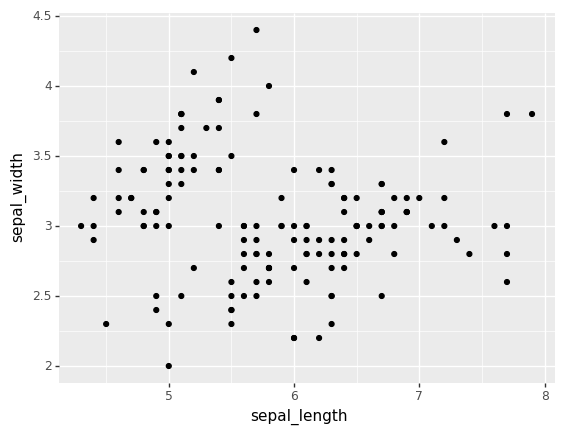

<ggplot: (299092325)>

In [8]:
ggplot(aes(x='sepal_length', y='sepal_width'), data = iris_df) + geom_point()
# or short form: ggplot(aes("sepal_length", "sepal_width"), iris_df) + geom_point()

The `ggplot` function has two required arguments: the `data` used for creating the plot, and an `aesthetic mapping` to describe how variables in said data are mapped to things we can see on the plot. Usually we also add geoms – a graphical representation of the data in the plot (points, lines, bars).

### Aesthetic mappings

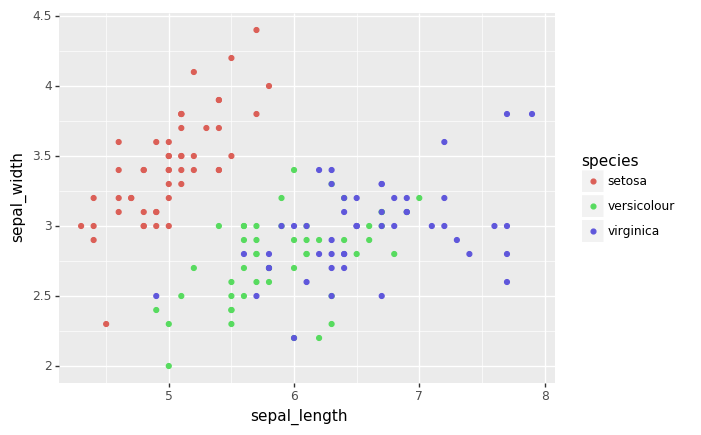

<ggplot: (298830845)>

In [9]:
ggplot(aes(x='sepal_length', y='sepal_width', color='species'), data = iris_df) + geom_point()

Variables can be mapped to position (x, y), color, shape, size, fill color - no matter whether a variable is categorial or numerical. 

### Faceting: Scatterplots separated by species 

plotnine/ggplot has a special technique called **faceting** that allows the user to split one plot into multiple plots based on a factor included in the dataset

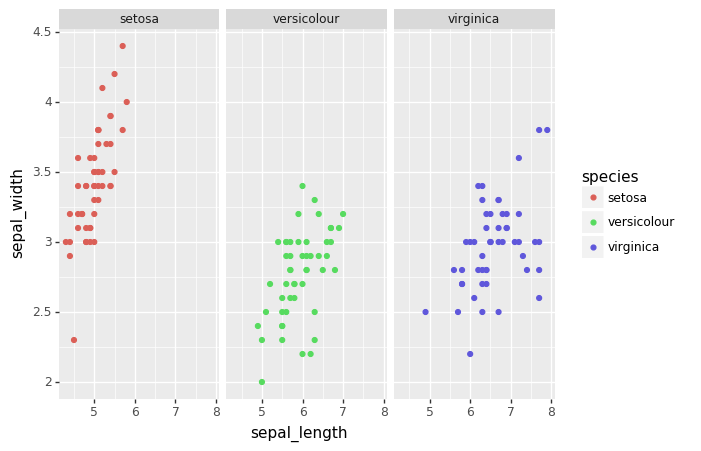

<ggplot: (298830825)>

In [10]:
ggplot(aes(x='sepal_length', y='sepal_width', color='species'), iris_df) \
   + geom_point() + facet_wrap('~species')

Let's assume the flowers have been collected at 5 different sites A-E coded in the variable field.

In [11]:
iris_df['field'] = list('ABCDE' * 30)

In [12]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,field
0,5.1,3.5,1.4,0.2,setosa,A
1,4.9,3.0,1.4,0.2,setosa,B
2,4.7,3.2,1.3,0.2,setosa,C
3,4.6,3.1,1.5,0.2,setosa,D
4,5.0,3.6,1.4,0.2,setosa,E


### Faceting: Scatter plots on separate panels per field and species

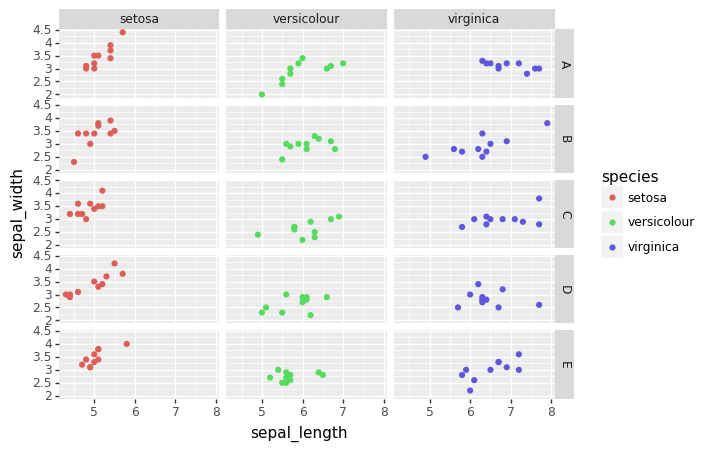

<ggplot: (302074549)>

In [13]:
ggplot(aes(x='sepal_length', y='sepal_width', color='species'), iris_df) \
  + geom_point() + facet_grid('field ~ species')

## ggplot2 and the Grammar of Graphics

The plotnine package provides an Python implementation of Leland Wilkinson's Grammar of Graphics (1999). The Grammar of Graphics challenges data analysts to think beyond the garden variety plot types (e.g. scatter-plot, barplot) and to consider the components that make up a plot or graphic, such as how data are represented on the plot (as lines, points, etc.), how variables are mapped to coordinates or plotting shape or colour, what transformation or statistical summary is required, and so on. Specifically, ggplot2 allows users to build a plot layer-by-layer by specifying:

- a geom*, which specifies how the data are represented on the plot (points, lines, bars, etc.),
- aesthetics that map variables in the data to axes on the plot or to plotting size, shape, color, etc.,
- a stat, a statistical transformation or summary of the data applied prior to plotting,
- facets, which we've already seen above, that allow the data to be divided into chunks on the basis of other categorical or continuous variables and the same plot drawn for each chunk.  
  
Because ggplot2 implements a layered grammar of graphics, data points and additional information (scatterplot smoothers, confidence bands, etc.) can be added to the plot via additional layers, each of which utilize further geoms, aesthetics, and stats.

To make the best use of ggplot2 it helps to understand the grammar and how it affects how plots are produced. In addition, it is important to note that ggplot2 is not a general-purpose plotting tool-kit; you may not be able to achieve certain plots or additions to a figure of they do not map onto concepts included in the layered grammar

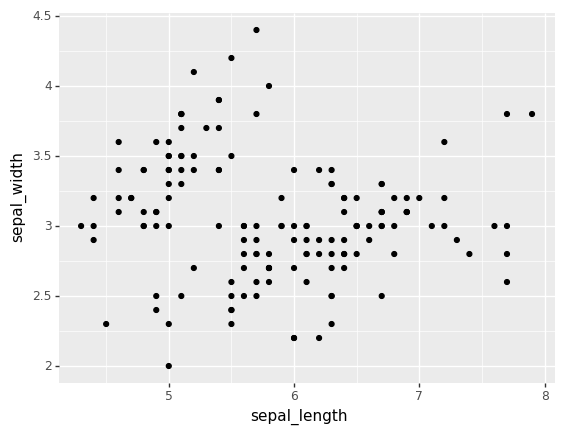

<ggplot: (302567769)>

In [14]:
ggplot(aes(x='sepal_length', y='sepal_width'), data = iris_df) + geom_point()

Here, we've built our plot in layers. First, we create a canvas for plotting layers to come using the ggplot function, specifying which data to use (here, the iris data frame), and an aesthetic mapping of Sepal_Length to the x-axis and Sepal_Width to the y-axis. We next add a layer to the plot, specifying a geom, or a way of visually representing the aesthetic mapping. Here we're using a point. Instead of using a point, we could use a different geom. Here, let's use 2d  binning heatmap instead of a point.

### Modify geometry to 2d bin counts

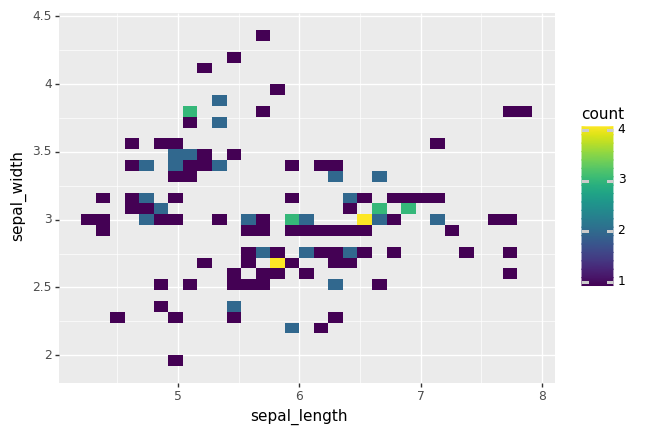

<ggplot: (302598885)>

In [15]:
ggplot(aes(x='sepal_length', y='sepal_width'), data = iris_df) + geom_bin2d()

### Adding transparency

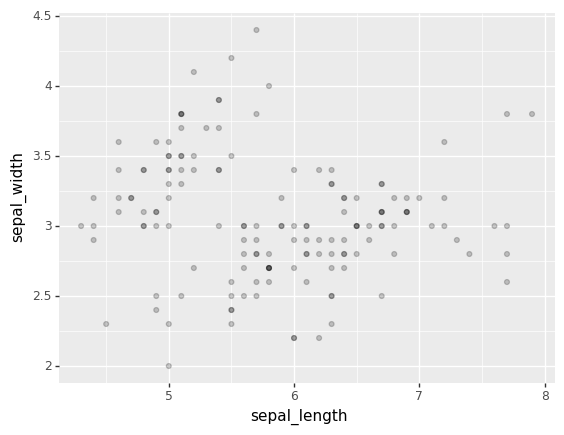

<ggplot: (302598845)>

In [16]:
ggplot(aes(x='sepal_length', y='sepal_width'), data = iris_df) + geom_point(alpha=0.2)

### Scatter plot smoothed with a linear model with confidence intervals
We can easily add more layers to the plot. For instance, we could add another layer displaying a smoothed conditional mean

/Users/fucileg_l/anaconda3/envs/plotnine/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


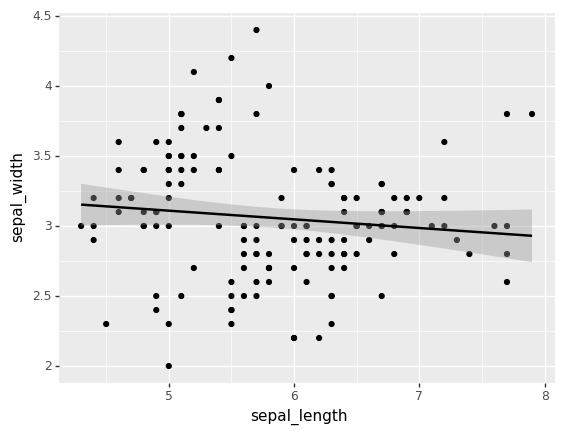

<ggplot: (302761905)>

In [17]:
ggplot(aes(x='sepal_length', y='sepal_width'), data = iris_df) + geom_point() \
  + geom_smooth(method='lm')

### Plots can be customized, e.g. plotting bigger points or manually set colors

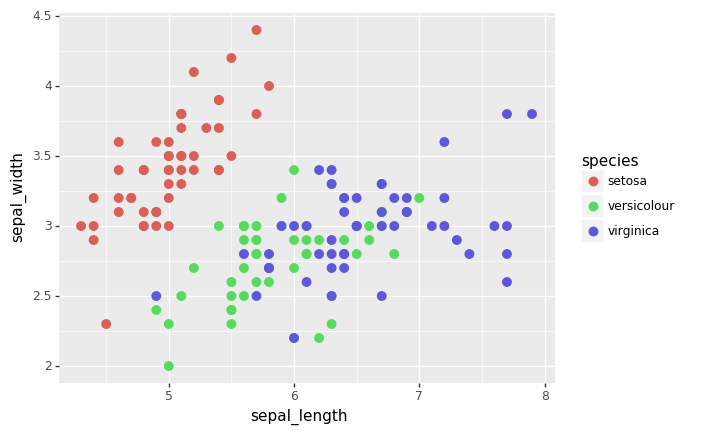

<ggplot: (302997285)>

In [18]:
ggplot(aes(x='sepal_length', y='sepal_width', color='species'), data = iris_df) + geom_point(size = 3)

### Modify the color scale

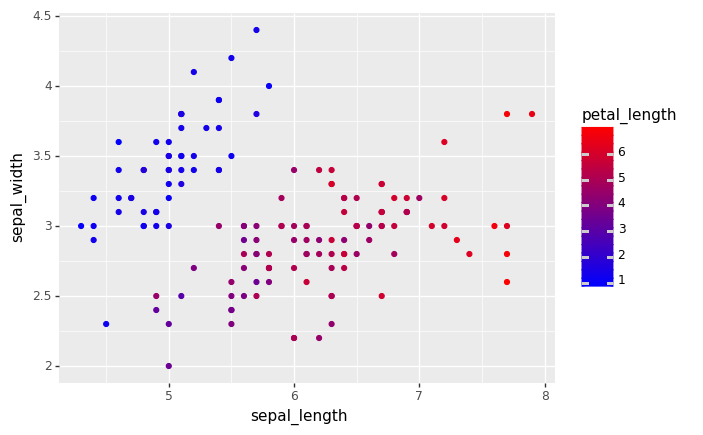

<ggplot: (303072389)>

In [19]:
ggplot(aes(x='sepal_length', y='sepal_width', color='petal_length'), data = iris_df) + geom_point() \
  + scale_color_gradient(low='blue', high='red')

### Box plots of the sepal length grouped separately by species, color-coded by the field

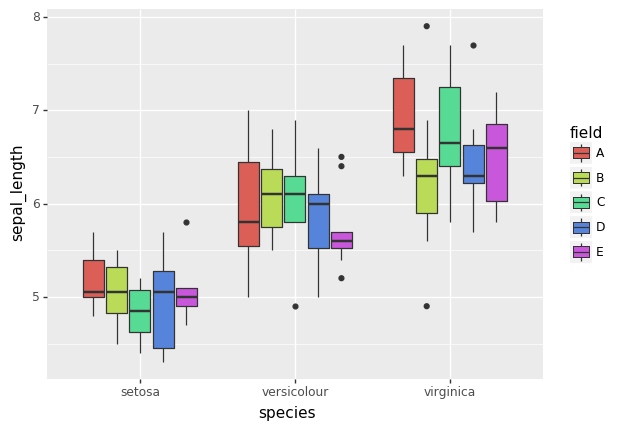

<ggplot: (303111073)>

In [20]:
ggplot(aes('species', 'sepal_length'), data = iris_df) + geom_boxplot(aes(fill='field'))

### Density plot (smooth histogram) of the iris' sepal length

Graphics can be built step by step by adding new elements

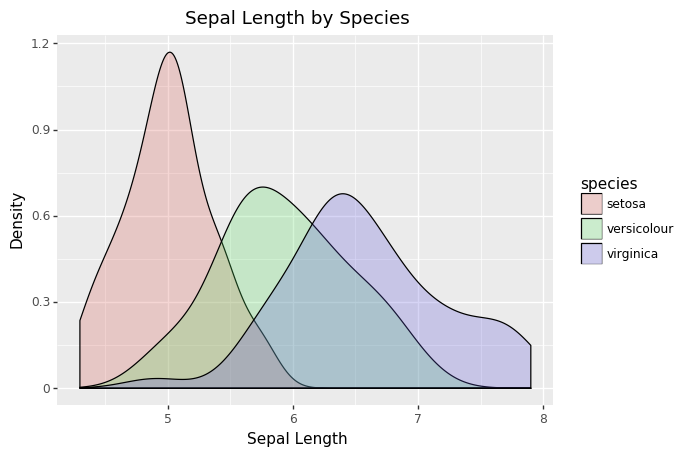

<ggplot: (303429065)>

In [21]:
p = ggplot(aes(x='sepal_length', fill='species'), data = iris_df) + geom_density(alpha=1/4)
p = p + ggtitle("Sepal Length by Species")
p = p + xlab("Sepal Length") + ylab("Density")
p

### Handy for exploring the data: Density plots separately for each field and species

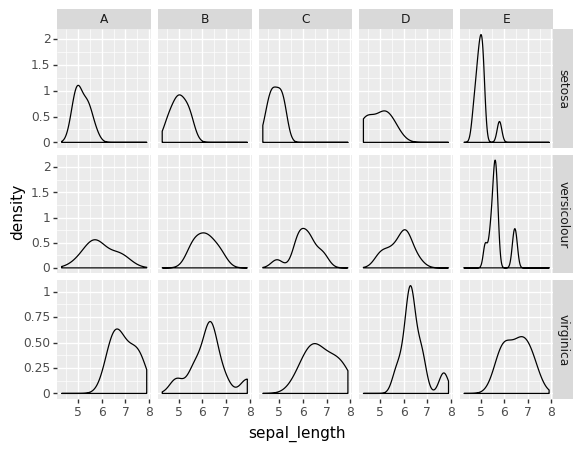

<ggplot: (303457481)>

In [22]:
ggplot(iris_df, aes(x='sepal_length')) + geom_density() \
    + facet_grid("species~field", scales="free_y")

### Overlaying geoms is easy

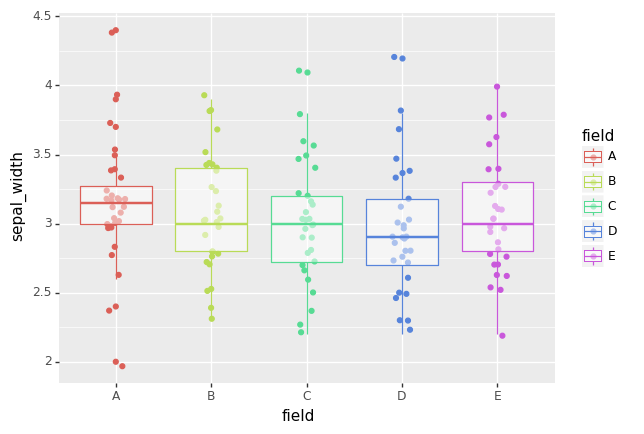

<ggplot: (302981089)>

In [23]:
ggplot(aes(x='field', y='sepal_width', color='field'), data=iris_df) + geom_jitter(width=0.1) + geom_boxplot(alpha=0.5)

### Themes and publication-quality plots

Note that the syntax is very similar to ggplot2 but not identical ("_" instead of "." separators, theme_text becomes element_text)

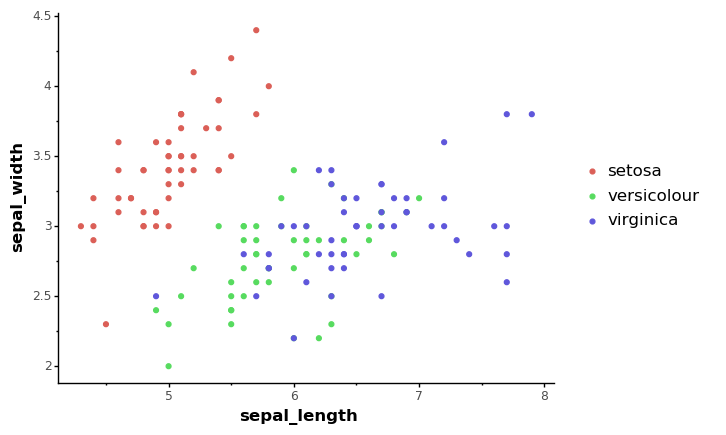

<ggplot: (302023113)>

In [24]:
ggplot(aes(x='sepal_length', y='sepal_width', color='species'), data = iris_df) + geom_point() \
   + theme_classic() + theme(axis_title_x = element_text(face="bold", size=12), 
                            axis_title_y = element_text(face="bold", size=12),
                            legend_text = element_text(size=12),#)
                            legend_title = element_blank())

In addition to theme_bw(), which changes the plot background to white, plotnine/ggplot comes with several other themes which can be useful to quickly change the look of your visualization

### Save plot
the file format is inferred from the file extension

In [ ]:
ggsave(filename = 'sepal_length_density.pdf', plot = p)

## plotnine resources

- https://plotnine.readthedocs.io/en/stable/api.html: documention of functions, geoms, scales, themes, ...
- https://plotnine.readthedocs.io/en/stable/: plotnine homepage 
- https://github.com/has2k1/plotnine-examples/tree/master/plotnine_examples: plotnine examples and tutorials
- http://ggplot.yhathq.com/: a different implementation of ggplot in Python

## Further ggplot2 resources (R's ggplot documentation is much larger)

- [Cheat Sheet](https://github.com/rstudio/cheatsheets/raw/master/data-visualization-2.1.pdf)
- http://docs.ggplot2.org/current/: The official ggplot2 documentation.
- http://egret.psychol.cam.ac.uk/statistics/R/graphs2.html: Publication-quality graphs
- http://learnr.wordpress.com/: A blog with a good number of posts describing how to reproduce various kind of plots using ggplot2.
- http://stackoverflow.com/questions/tagged/ggplot2: Thousands of questions and answers tagged with "ggplot2" on Stack Overflow, a programming Q&A site.

# Exercises

(The exercises are from the Data Carpentry R ecology lesson)

You can find the documentation of plotnine functions, geoms, scales, themes, ... at https://plotnine.readthedocs.io/en/stable/api.html

1. Plot a box plot of sepal.length for each species
2. Replace the box plot with a violin plot; see `geom_violin()`
3. Try out `geom_jitter()`, a geom that draws a point defined by an x and y coordinate, like geom_point, but jitters the points to avoid overplotting.
4. In many types of data, it is important to consider the scale of the observations. For example, it may be worth changing the scale of the axis to better distribute the observations in the space of the plot. Changing the scale of the axes is done similarly to adding/modifying other components (i.e., by incrementally adding commands). Try making these modifications: Represent sepal.length on the log10 scale; see `scale_y_log10()`
5. Please take another five minutes to either improve one of the plots generated in this lesson or create a beautiful graph of your own. Use the [R/ggplot2 cheat sheet](https://github.com/rstudio/cheatsheets/raw/master/data-visualization-2.1.pdf) for inspiration (e.g. change the thickness of lines, name of the legend, ...). You can also use the https://plotnine.readthedocs.io/en/stable/api.html to find out the exact plotnine syntax.

# Solutions

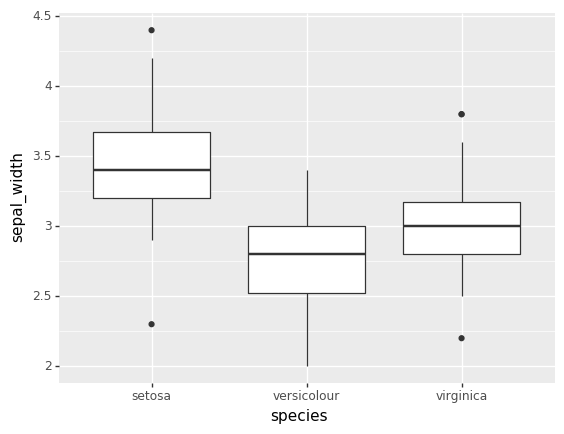

<ggplot: (302015117)>

In [25]:
# Solution for Exercise 1, 2 and 3

g = ggplot(aes(x='species', y='sepal_width'), data=iris_df) + geom_boxplot()
g
# g + geom_violin()
# g + geom_jitter()

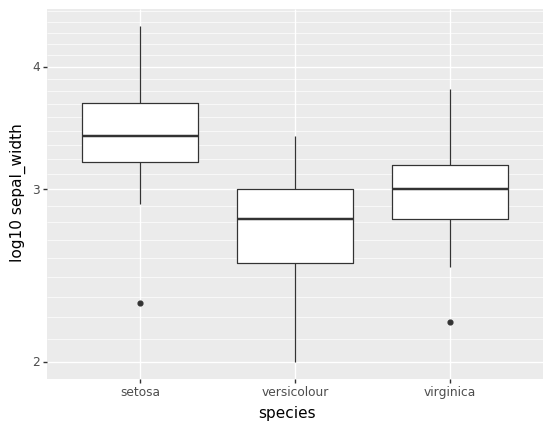

<ggplot: (302600585)>

In [26]:
# Solution for Exercise 4

ggplot(aes(x='species', y='sepal_width'), data=iris_df) + geom_boxplot() + scale_y_log10() + ylab("log10 sepal_width")